In [2]:
import requests
import pandas as pd

def get_evolution_chain(chain_id):
    """Fetches the entire evolution chain based on the chain ID."""
    url = f"https://pokeapi.co/api/v2/evolution-chain/{chain_id}/"
    response = requests.get(url)
    if response.status_code == 200:
        evolution_data = response.json()
        evolutions = []
        current_stage = evolution_data['chain']
        
        # Loop through the evolution stages
        while current_stage:
            evolutions.append(current_stage['species']['name'])
            current_stage = current_stage['evolves_to'][0] if current_stage['evolves_to'] else None
        return ' -> '.join(evolutions)
    return "No evolution data"

def get_pokemon_moves(pokemon_name):
    """Fetches the moves for the specified Pokémon."""
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_name.lower()}/"
    response = requests.get(url)
    if response.status_code == 200:
        pokemon_data = response.json()
        moves = [{
            'move_name': move['move']['name'],
            'level': move['version_group_details'][0]['level_learned_at'],
            'learn_method': move['version_group_details'][0]['move_learn_method']['name']
        } for move in pokemon_data['moves']]
        return moves
    return []

def get_pokemon_details(pokemon_name):
    """Fetches and returns detailed information for a given Pokémon."""
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_name.lower()}/"
    response = requests.get(url)
    if response.status_code == 200:
        pokemon_data = response.json()
        
        # Fetch evolution chain if available
        species_url = pokemon_data['species']['url']
        species_response = requests.get(species_url)
        if species_response.status_code == 200:
            species_data = species_response.json()
            evolution_chain_id = species_data['evolution_chain']['url'].split('/')[-2]
            evolution_chain = get_evolution_chain(evolution_chain_id)
        else:
            evolution_chain = "No evolution data"
        
        # Fetch moves
        moves = get_pokemon_moves(pokemon_name)
        
        return {
            'name': pokemon_data['name'],
            'types': ', '.join([type_info['type']['name'] for type_info in pokemon_data['types']]),
            'abilities': ', '.join([ability['ability']['name'] for ability in pokemon_data['abilities']]),
            'hp': next(item for item in pokemon_data['stats'] if item['stat']['name'] == 'hp')['base_stat'],
            'attack': next(item for item in pokemon_data['stats'] if item['stat']['name'] == 'attack')['base_stat'],
            'defense': next(item for item in pokemon_data['stats'] if item['stat']['name'] == 'defense')['base_stat'],
            'special-attack': next(item for item in pokemon_data['stats'] if item['stat']['name'] == 'special-attack')['base_stat'],
            'special-defense': next(item for item in pokemon_data['stats'] if item['stat']['name'] == 'special-defense')['base_stat'],
            'speed': next(item for item in pokemon_data['stats'] if item['stat']['name'] == 'speed')['base_stat'],
            'weight': pokemon_data['weight'],
            'base_experience': pokemon_data['base_experience'],
            'evolution_chain': evolution_chain,
            'moves': moves
        }
    else:
        print(f"Failed to retrieve data for Pokémon {pokemon_name}")
        return None

def get_generation_pokemon(gen_id):
    """Fetches and returns a list of detailed information for Pokémon in a given generation."""
    gen_url = f"https://pokeapi.co/api/v2/generation/{gen_id}/"
    response = requests.get(gen_url)
    pokemon_details_list = []
    if response.status_code == 200:
        generation_data = response.json()
        for pokemon_species in generation_data['pokemon_species']:
            pokemon_name = pokemon_species['name']
            pokemon_data = get_pokemon_details(pokemon_name)
            if pokemon_data:
                pokemon_details_list.append(pokemon_data)
    else:
        print(f"Failed to retrieve data for Generation {gen_id}")
    return pokemon_details_list

# Fetch detailed information for Generation 1 and Generation 2 Pokémon
generation_1_pokemon_details = get_generation_pokemon(1)
generation_2_pokemon_details = get_generation_pokemon(2)


In [3]:
# Creating DataFrames
gen1_df = pd.DataFrame(generation_1_pokemon_details)
gen2_df = pd.DataFrame(generation_2_pokemon_details)

# Print the DataFrames to see some of the data
print("Generation 1 Pokémon DataFrame:")
print(gen1_df.head())  # Shows the first few rows of the DataFrame

print("\nGeneration 2 Pokémon DataFrame:")
print(gen2_df.head())  # Shows the first few rows of the DataFrame

Generation 1 Pokémon DataFrame:
         name          types              abilities  hp  attack  defense  \
0   bulbasaur  grass, poison  overgrow, chlorophyll  45      49       49   
1  charmander           fire     blaze, solar-power  39      52       43   
2    squirtle          water     torrent, rain-dish  44      48       65   
3    caterpie            bug  shield-dust, run-away  45      30       35   
4      weedle    bug, poison  shield-dust, run-away  40      35       30   

   special-attack  special-defense  speed  weight  base_experience  \
0              65               65     45      69               64   
1              60               50     65      85               62   
2              50               64     43      90               63   
3              20               20     45      29               39   
4              20               20     50      32               39   

                         evolution_chain  \
0       bulbasaur -> ivysaur -> venusaur   
1 

In [4]:
gen1_df

,name,types,abilities,hp,attack,defense,special-attack,special-defense,speed,weight,base_experience,evolution_chain,moves
0,bulbasaur,"grass, poison","overgrow, chlorophyll",45,49,49,65,65,45,69,64,bulbasaur -> ivysaur -> venusaur,"[{'move_name': 'razor-wind', 'level': 0, 'lear..."
1,charmander,fire,"blaze, solar-power",39,52,43,60,50,65,85,62,charmander -> charmeleon -> charizard,"[{'move_name': 'mega-punch', 'level': 0, 'lear..."
2,squirtle,water,"torrent, rain-dish",44,48,65,50,64,43,90,63,squirtle -> wartortle -> blastoise,"[{'move_name': 'mega-punch', 'level': 0, 'lear..."
3,caterpie,bug,"shield-dust, run-away",45,30,35,20,20,45,29,39,caterpie -> metapod -> butterfree,"[{'move_name': 'tackle', 'level': 1, 'learn_me..."
4,weedle,"bug, poison","shield-dust, run-away",40,35,30,20,20,50,32,39,weedle -> kakuna -> beedrill,"[{'move_name': 'poison-sting', 'level': 1, 'le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,omastar,"rock, water","swift-swim, shell-armor, weak-armor",70,60,125,115,70,55,350,173,omanyte -> omastar,"[{'move_name': 'bind', 'level': 0, 'learn_meth..."
147,kabutops,"rock, water","swift-swim, battle-armor, weak-armor",60,115,105,65,70,80,405,173,kabuto -> kabutops,"[{'move_name': 'scratch', 'level': 1, 'learn_m..."
148,snorlax,normal,"immunity, thick-fat, gluttony",160,110,65,65,110,30,4600,189,munchlax -> snorlax,"[{'move_name': 'mega-punch', 'level': 0, 'lear..."
149,dragonair,dragon,"shed-skin, marvel-scale",61,84,65,70,70,70,165,147,dratini -> dragonair -> dragonite,"[{'move_name': 'bind', 'level': 0, 'learn_meth..."


In [5]:
gen1_df.to_csv('data_gen1.csv', index=False)

In [6]:
gen2_df

,name,types,abilities,hp,attack,defense,special-attack,special-defense,speed,weight,base_experience,evolution_chain,moves
0,chikorita,grass,"overgrow, leaf-guard",45,49,65,49,65,45,64,64,chikorita -> bayleef -> meganium,"[{'move_name': 'swords-dance', 'level': 0, 'le..."
1,cyndaquil,fire,"blaze, flash-fire",39,52,43,60,50,65,79,62,cyndaquil -> quilava -> typhlosion,"[{'move_name': 'cut', 'level': 0, 'learn_metho..."
2,totodile,water,"torrent, sheer-force",50,65,64,44,48,43,95,63,totodile -> croconaw -> feraligatr,"[{'move_name': 'mega-punch', 'level': 0, 'lear..."
3,sentret,normal,"run-away, keen-eye, frisk",35,46,34,35,45,20,60,43,sentret -> furret,"[{'move_name': 'fire-punch', 'level': 0, 'lear..."
4,hoothoot,"normal, flying","insomnia, keen-eye, tinted-lens",60,30,30,36,56,50,212,52,hoothoot -> noctowl,"[{'move_name': 'wing-attack', 'level': 0, 'lea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,porygon2,normal,"trace, download, analytic",85,80,90,105,95,60,325,180,porygon -> porygon2 -> porygon-z,"[{'move_name': 'tackle', 'level': 1, 'learn_me..."
96,hitmontop,fighting,"intimidate, technician, steadfast",50,95,95,35,110,70,480,159,tyrogue -> hitmonlee,"[{'move_name': 'mega-punch', 'level': 0, 'lear..."
97,blissey,normal,"natural-cure, serene-grace, healer",255,10,10,75,135,55,468,635,happiny -> chansey -> blissey,"[{'move_name': 'pound', 'level': 1, 'learn_met..."
98,pupitar,"rock, ground",shed-skin,70,84,70,65,70,51,1520,144,larvitar -> pupitar -> tyranitar,"[{'move_name': 'headbutt', 'level': 0, 'learn_..."


In [7]:
gen2_df.to_csv('data_gen2.csv', index=False)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your DataFrame ready as gen1_df and gen2_df
# If these are separate, you might want to combine them for some analyses
pokemon_df = pd.concat([gen1_df, gen2_df], ignore_index=True)


In [6]:
# Display the first few rows of the DataFrame
print(pokemon_df.head())

# Summary of the dataframe
print(pokemon_df.describe())

# Information about the dataset
print(pokemon_df.info())


         name          types              abilities  hp  attack  defense  \
0   bulbasaur  grass, poison  overgrow, chlorophyll  45      49       49   
1  charmander           fire     blaze, solar-power  39      52       43   
2    squirtle          water     torrent, rain-dish  44      48       65   
3    caterpie            bug  shield-dust, run-away  45      30       35   
4      weedle    bug, poison  shield-dust, run-away  40      35       30   

   special-attack  special-defense  speed  weight  base_experience  \
0              65               65     45      69               64   
1              60               50     65      85               62   
2              50               64     43      90               63   
3              20               20     45      29               39   
4              20               20     50      32               39   

                         evolution_chain  \
0       bulbasaur -> ivysaur -> venusaur   
1  charmander -> charmeleon -> cha

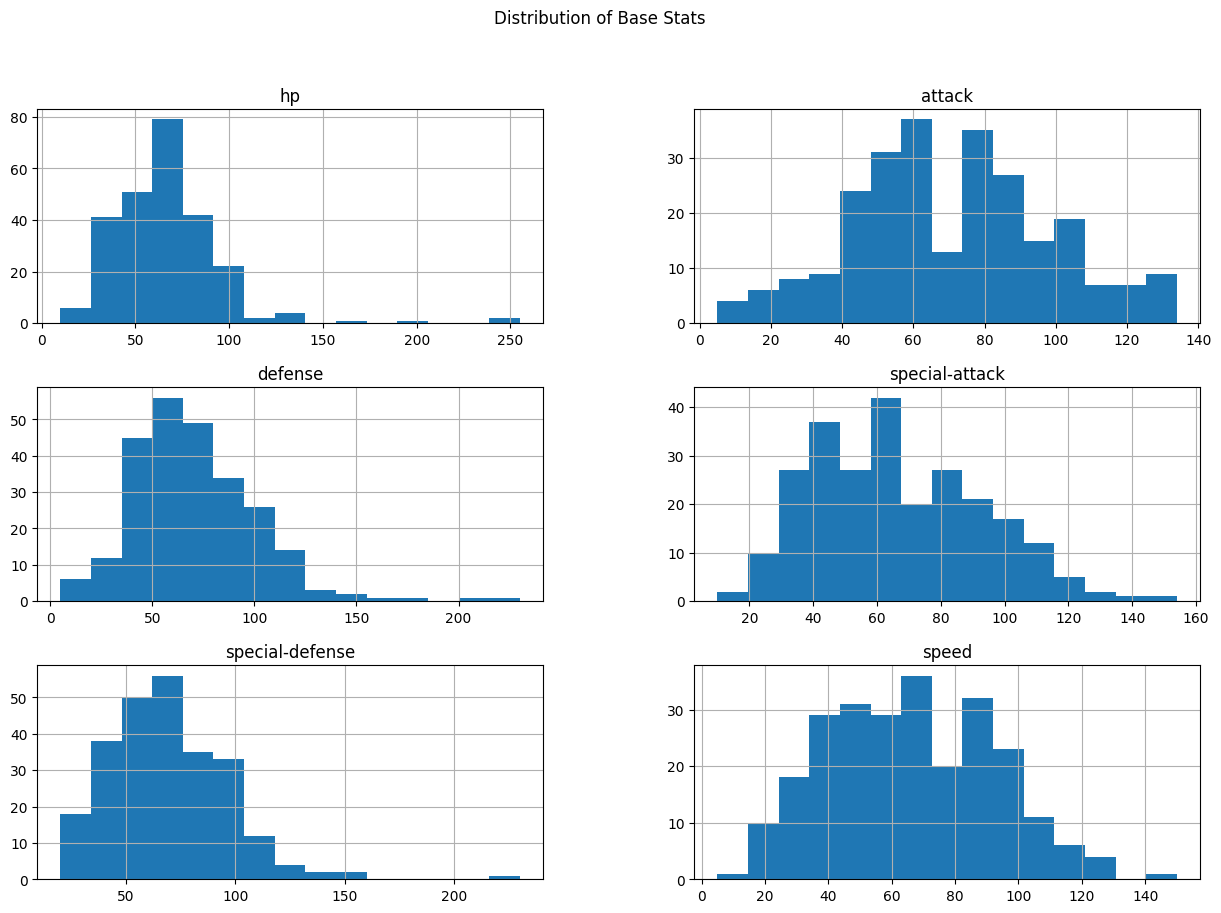

In [7]:
# Histograms of base stats
pokemon_df[['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Base Stats')
plt.show()


/var/folders/3h/rjpld5qj6yj68h8vd8f4t56c0000gp/T/ipykernel_79686/3662023595.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


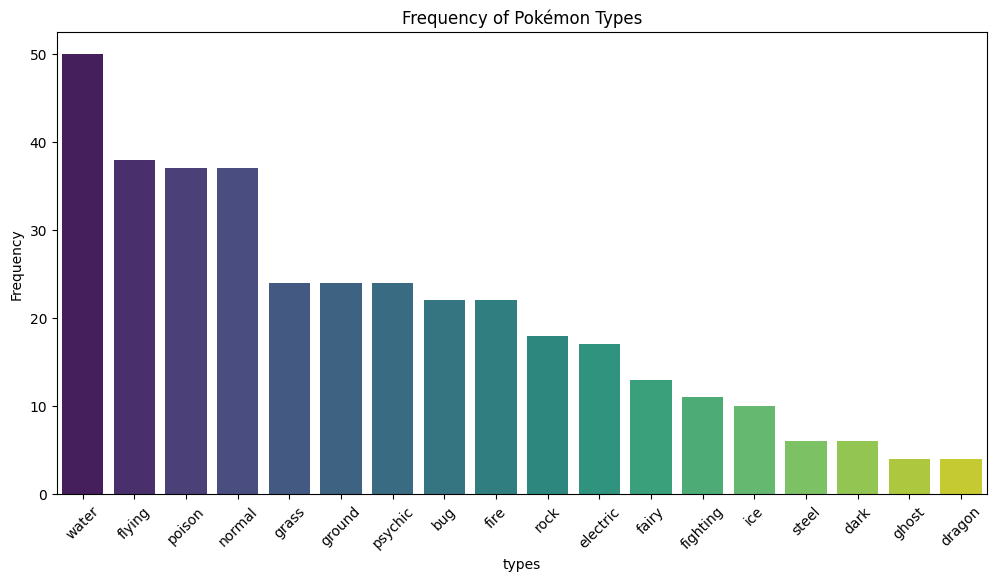

In [8]:
# Split the types and count each type's frequency
type_counts = pokemon_df['types'].str.split(', ').explode().value_counts()

# Bar plot of Pokémon types
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Frequency of Pokémon Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


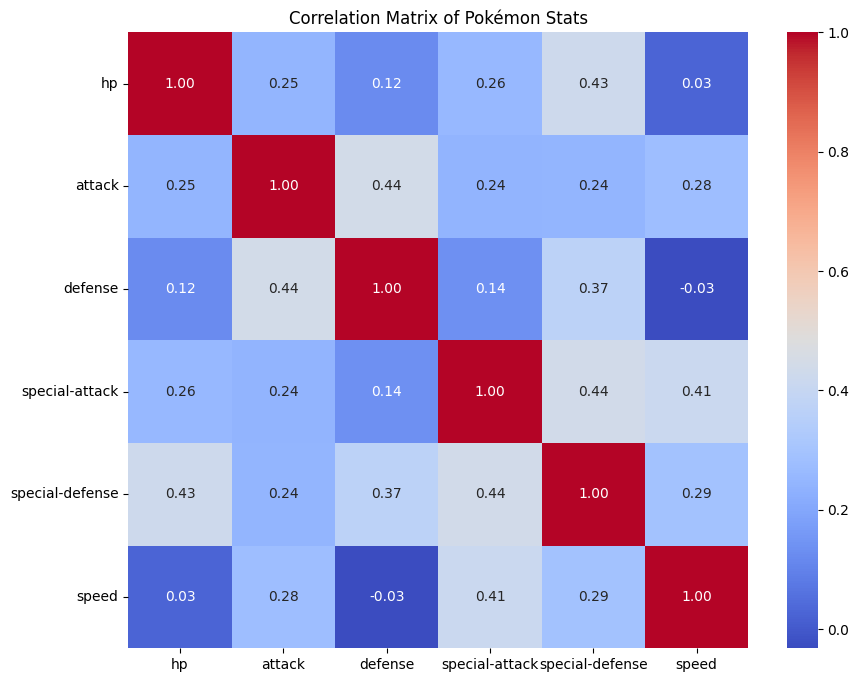

In [9]:
# Compute the correlation matrix
corr = pokemon_df[['hp', 'attack', 'defense', 'special-attack', 'special-defense', 'speed']].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Pokémon Stats')
plt.show()


/var/folders/3h/rjpld5qj6yj68h8vd8f4t56c0000gp/T/ipykernel_79686/1181568270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='evolution_chain_length', data=pokemon_df, palette='pastel')


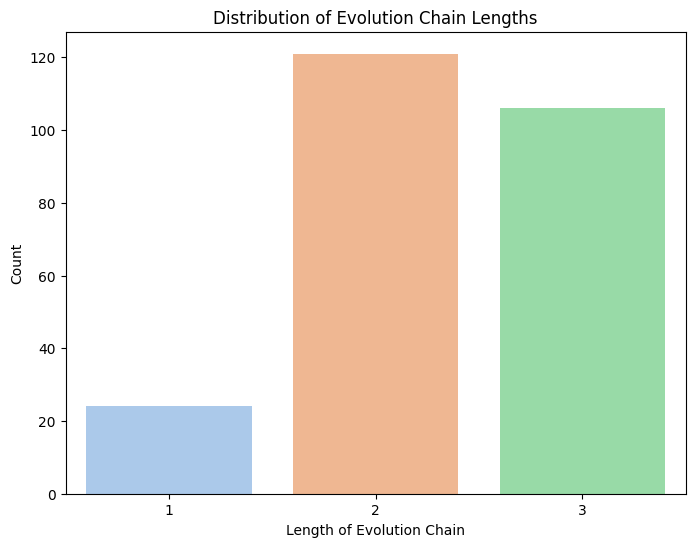

In [10]:
# Add a column for evolution chain length
pokemon_df['evolution_chain_length'] = pokemon_df['evolution_chain'].apply(lambda x: len(x.split(' -> ')))

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(x='evolution_chain_length', data=pokemon_df, palette='pastel')
plt.title('Distribution of Evolution Chain Lengths')
plt.xlabel('Length of Evolution Chain')
plt.ylabel('Count')
plt.show()


/var/folders/3h/rjpld5qj6yj68h8vd8f4t56c0000gp/T/ipykernel_79686/2265577174.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_moves.values, y=common_moves.index, palette='viridis')


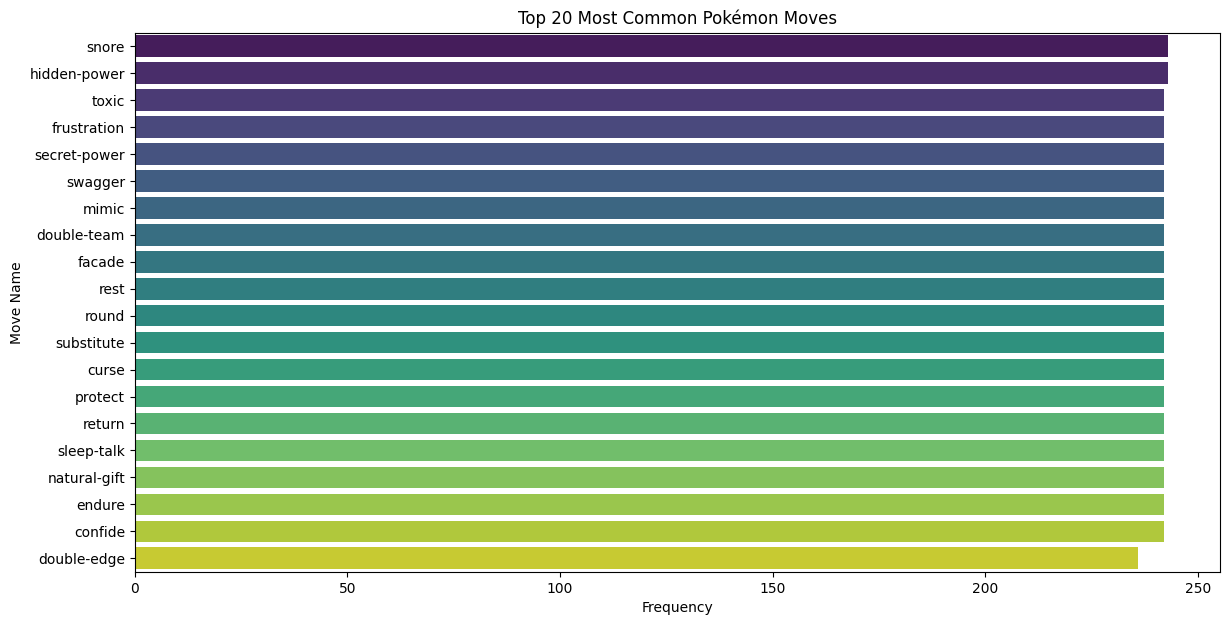

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Let's assume 'pokemon_df' is your DataFrame that includes all the Pokémon data
# Unpack moves from each Pokémon into a new DataFrame
all_moves = []
for index, row in pokemon_df.iterrows():
    for move in row['moves']:
        move.update({'pokemon': row['name']})
        all_moves.append(move)

moves_df = pd.DataFrame(all_moves)

# Now count the most common moves
common_moves = moves_df['move_name'].value_counts().head(20)  # top 20 most common moves

# Plotting the most common moves
plt.figure(figsize=(14, 7))
sns.barplot(x=common_moves.values, y=common_moves.index, palette='viridis')
plt.title('Top 20 Most Common Pokémon Moves')
plt.xlabel('Frequency')
plt.ylabel('Move Name')
plt.show()


/var/folders/3h/rjpld5qj6yj68h8vd8f4t56c0000gp/T/ipykernel_79686/1203822409.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Type', data=vulnerability_df, palette='rocket')  # No hue needed


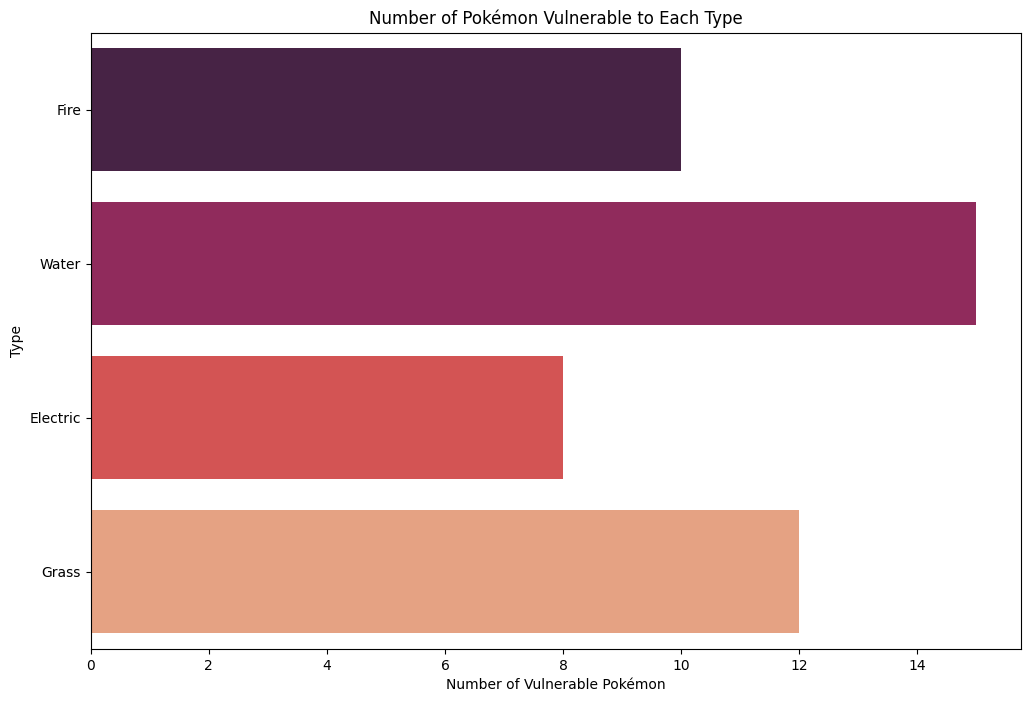

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define type vulnerabilities count from your earlier setup
vulnerability_count = {'Fire': 10, 'Water': 15, 'Electric': 8, 'Grass': 12}  # example data

# Using pandas for data handling
import pandas as pd
vulnerability_df = pd.DataFrame(list(vulnerability_count.items()), columns=['Type', 'Count'])

# Plotting type vulnerabilities with matplotlib and seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Type', data=vulnerability_df, palette='rocket')  # No hue needed
plt.title('Number of Pokémon Vulnerable to Each Type')
plt.xlabel('Number of Vulnerable Pokémon')
plt.ylabel('Type')
plt.show()


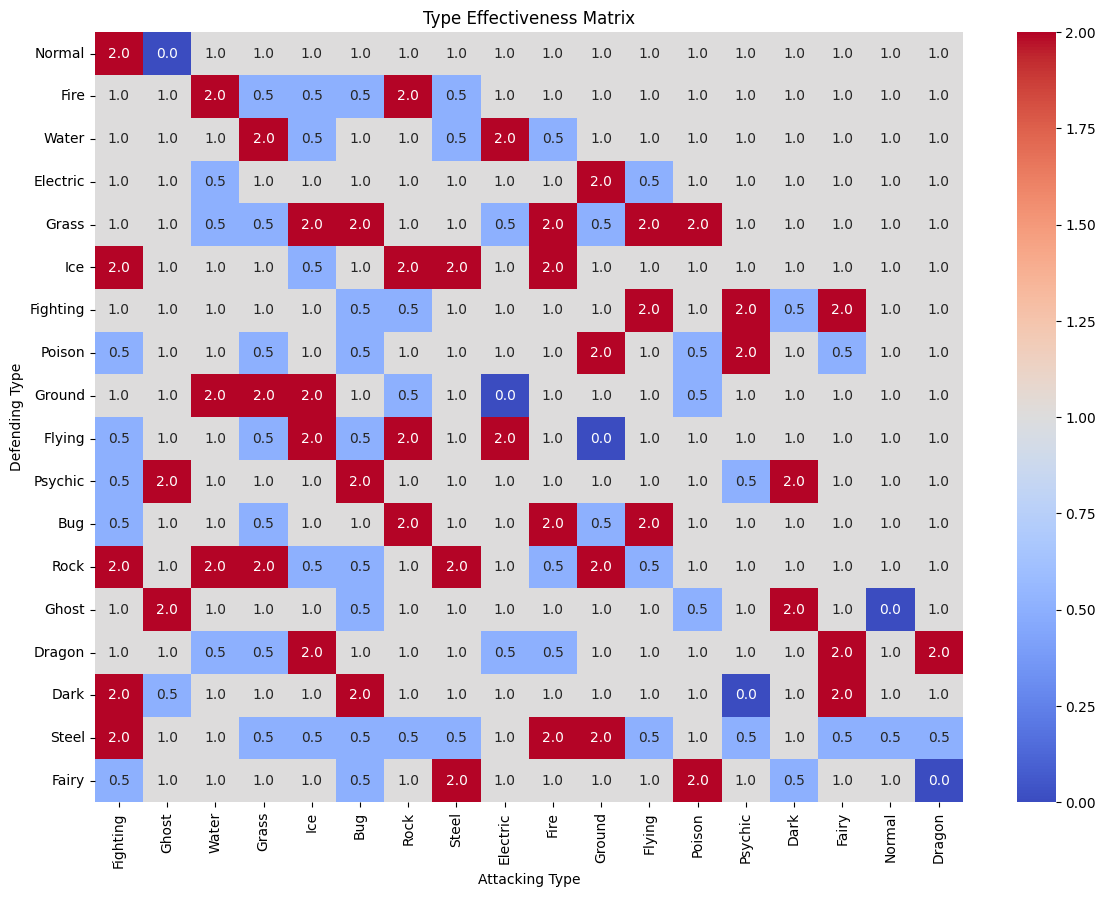

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define effectiveness in a dictionary of dictionaries
effectiveness = {
    'Normal': {'Fighting': 2, 'Ghost': 0},
    'Fire': {'Water': 2, 'Grass': 0.5, 'Ice': 0.5, 'Bug': 0.5, 'Rock': 2, 'Steel': 0.5},
    'Water': {'Electric': 2, 'Grass': 2, 'Fire': 0.5, 'Ice': 0.5, 'Steel': 0.5},
    'Electric': {'Ground': 2, 'Water': 0.5, 'Flying': 0.5},
    'Grass': {'Fire': 2, 'Water': 0.5, 'Grass': 0.5, 'Electric': 0.5, 'Ice': 2, 'Poison': 2, 'Ground': 0.5, 'Flying': 2, 'Bug': 2},
    'Ice': {'Fire': 2, 'Ice': 0.5, 'Fighting': 2, 'Rock': 2, 'Steel': 2},
    'Fighting': {'Flying': 2, 'Psychic': 2, 'Bug': 0.5, 'Rock': 0.5, 'Dark': 0.5, 'Fairy': 2},
    'Poison': {'Ground': 2, 'Psychic': 2, 'Grass': 0.5, 'Fighting': 0.5, 'Poison': 0.5, 'Bug': 0.5, 'Fairy': 0.5},
    'Ground': {'Water': 2, 'Grass': 2, 'Electric': 0, 'Ice': 2, 'Poison': 0.5, 'Rock': 0.5},
    'Flying': {'Electric': 2, 'Grass': 0.5, 'Ice': 2, 'Fighting': 0.5, 'Ground': 0, 'Bug': 0.5, 'Rock': 2},
    'Psychic': {'Bug': 2, 'Ghost': 2, 'Dark': 2, 'Fighting': 0.5, 'Psychic': 0.5},
    'Bug': {'Fire': 2, 'Grass': 0.5, 'Fighting': 0.5, 'Ground': 0.5, 'Flying': 2, 'Rock': 2},
    'Rock': {'Water': 2, 'Grass': 2, 'Fighting': 2, 'Ground': 2, 'Steel': 2, 'Fire': 0.5, 'Ice': 0.5, 'Flying': 0.5, 'Bug': 0.5},
    'Ghost': {'Ghost': 2, 'Dark': 2, 'Normal': 0, 'Bug': 0.5, 'Poison': 0.5},
    'Dragon': {'Ice': 2, 'Dragon': 2, 'Fairy': 2, 'Fire': 0.5, 'Water': 0.5, 'Grass': 0.5, 'Electric': 0.5},
    'Dark': {'Fighting': 2, 'Bug': 2, 'Fairy': 2, 'Ghost': 0.5, 'Psychic': 0},
    'Steel': {'Fire': 2, 'Ground': 2, 'Fighting': 2, 'Normal': 0.5, 'Grass': 0.5, 'Ice': 0.5, 'Flying': 0.5, 'Psychic': 0.5, 'Bug': 0.5, 'Rock': 0.5, 'Dragon': 0.5, 'Steel': 0.5, 'Fairy': 0.5},
    'Fairy': {'Poison': 2, 'Steel': 2, 'Fighting': 0.5, 'Bug': 0.5, 'Dragon': 0, 'Dark': 0.5}
}

# Convert to DataFrame for visualization
effectiveness_df = pd.DataFrame(effectiveness).T.fillna(1)  # fillna(1) means normal effectiveness

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(effectiveness_df, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Type Effectiveness Matrix')
plt.xlabel('Attacking Type')
plt.ylabel('Defending Type')
plt.show()


/var/folders/3h/rjpld5qj6yj68h8vd8f4t56c0000gp/T/ipykernel_79686/2759175767.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vulnerabilities.index, y=vulnerabilities, palette='viridis')


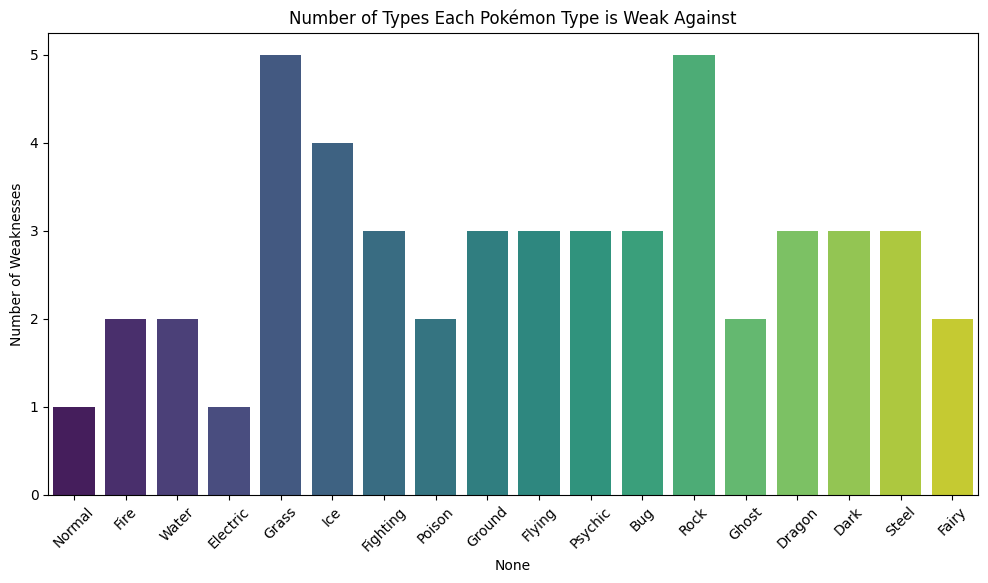

/var/folders/3h/rjpld5qj6yj68h8vd8f4t56c0000gp/T/ipykernel_79686/2759175767.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resilience.index, y=resilience, palette='rocket')


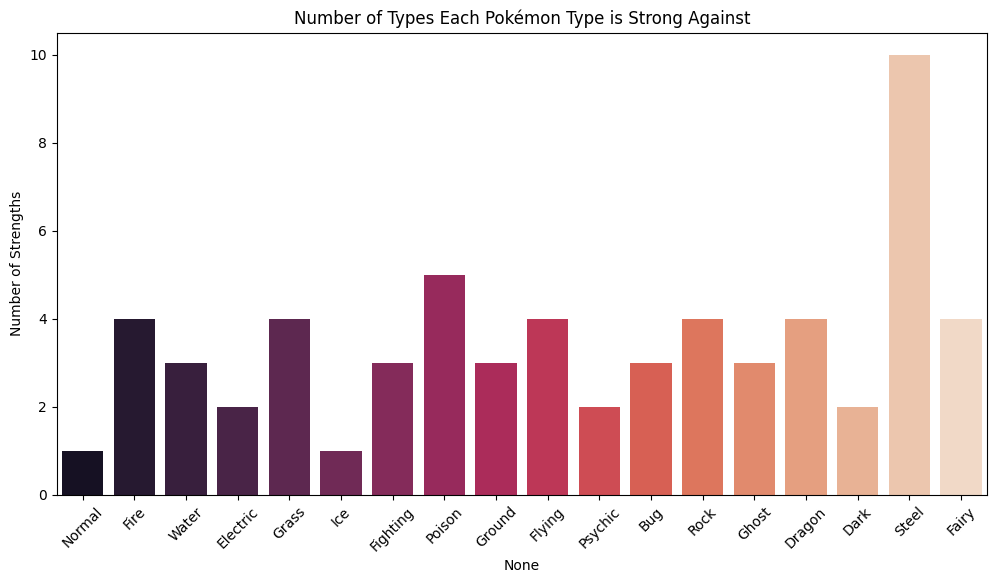

In [15]:
# Calculate vulnerabilities (how many types are they weak against)
vulnerabilities = effectiveness_df.apply(lambda row: (row > 1).sum(), axis=1)

# Calculate resilience (how many types they are strong against)
resilience = effectiveness_df.apply(lambda row: (row < 1).sum(), axis=1)

# Plotting vulnerabilities
plt.figure(figsize=(12, 6))
sns.barplot(x=vulnerabilities.index, y=vulnerabilities, palette='viridis')
plt.title('Number of Types Each Pokémon Type is Weak Against')
plt.xticks(rotation=45)
plt.ylabel('Number of Weaknesses')
plt.show()

# Plotting resilience
plt.figure(figsize=(12, 6))
sns.barplot(x=resilience.index, y=resilience, palette='rocket')
plt.title('Number of Types Each Pokémon Type is Strong Against')
plt.xticks(rotation=45)
plt.ylabel('Number of Strengths')
plt.show()
